In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



$$\widehat{f}_h(x) = \frac{1}{n}\sum_{i=1}^n K_h (x - x_i) = \frac{1}{nh} \sum_{i=1}^n K\Big(\frac{x-x_i}{h}\Big)$$

In [31]:
def kernel(x,y,sigma):
    return np.exp(-(x**2+y**2)/sigma)

In [32]:
def kde_estimate(x,y,data,sigma=1.0):
    estimate = 0
    for i,j in data:
        estimate += kernel(x-i,y-j,sigma)
    return estimate/len(data)
    

In [69]:
data= np.random.rand(1000,2)

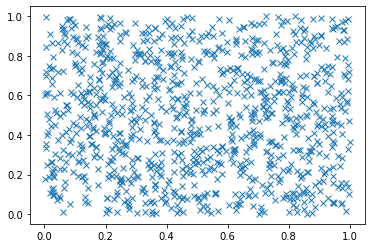

In [70]:
plt.plot(data[:,0],data[:,1],"x")

In [72]:
x = np.linspace(0,1,10)
y = np.linspace(0,1,10)

arr = np.zeros((10,10))

for i,j in enumerate(x):
    for k,l in enumerate(y):
        arr[i,k] = kde_estimate(j,l,data,sigma=0.05)

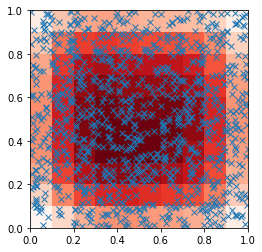

In [75]:
imshow(arr.T[::-1,:],extent=[0,1,0,1],cmap="Reds")
plt.plot(data[:,0],data[:,1],"x")

In [25]:
kde_x = np.linspace(-1,2,100)

In [29]:
kde_y = kde_estimate(kde_x,data,sigma=0.05)

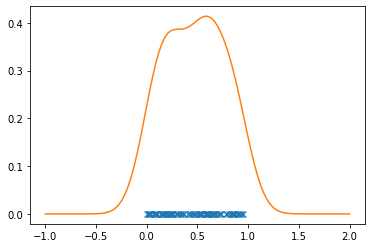

In [30]:
plt.plot(data,np.zeros(100),"x")
plt.plot(kde_x,kde_y)

In [76]:
import sklearn

In [77]:
from sklearn import datasets

In [81]:
boston = datasets.load_boston()

In [82]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [83]:
X = boston["data"]

In [84]:
Y = boston["target"] #house price in this case

In [85]:
X.shape

(506, 13)

Text(0.5, 1.0, 'TAX')

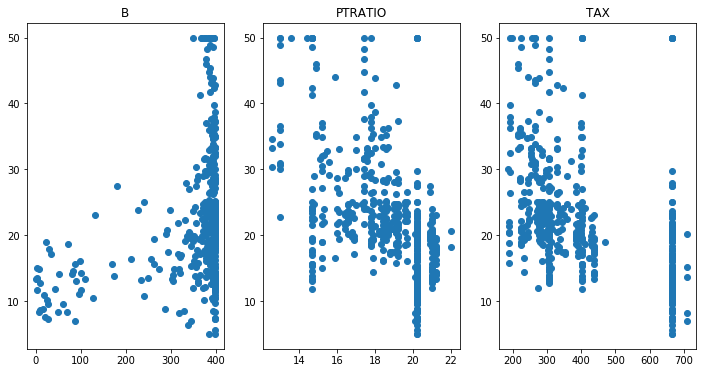

In [141]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,6))
ax1.scatter(X[:,11],Y)
ax1.set_title(boston.feature_names[11])
ax2.scatter(X[:,10],Y)
ax2.set_title(boston.feature_names[10])
ax3.scatter(X[:,9],Y)
ax3.set_title(boston.feature_names[9])


# Exploratory Analysis!

Make sure the data looks okay!
Start formulating hypothesis!

In [92]:
import math

In [101]:
half = math.floor(len(Y)/2)

permutation = np.random.permutation(506)

#randomize order to not have bias!
X = X[permutation]
Y = Y[permutation]

train_X = X[:half]
train_Y = Y[:half]

test_X = X[half:]
test_Y = Y[half:]

In [103]:
from sklearn import linear_model

In [108]:
clf = linear_model.LinearRegression()

In [109]:
clf.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
Y_lr_pred = clf.predict(test_X)

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
from sklearn import metrics

In [118]:
mean_squared_error(test_Y,Y_lr_pred)

27.387913576658157

In [119]:
Y_train_pred = clf.predict(train_X)

In [120]:
mean_squared_error(train_Y,Y_train_pred)

18.028386552901015

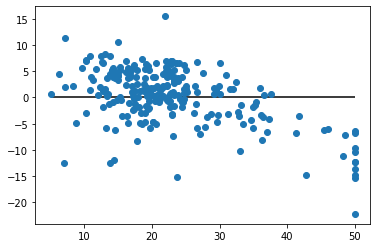

In [124]:
f,ax = plt.subplots()
ax.plot(test_Y, Y_lr_pred-test_Y,"o")
ax.hlines(0,min(test_Y),max(test_Y))

# Breakout!

1) Make sure your sklearn is working!

2) Do the same analysis with california housing set!

In [129]:
a = datasets.california_housing

In [152]:
data = a.fetch_california_housing()

In [153]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

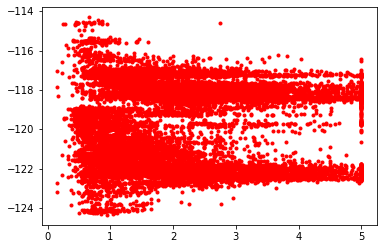

In [154]:
plt.plot(data.target,data.data[:,-1],"r.")

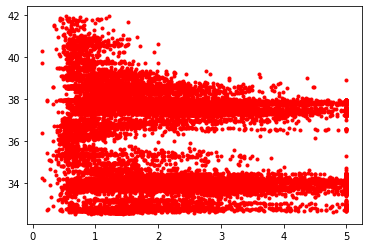

In [155]:
plt.plot(data.target,data.data[:,-2],"r.")

In [159]:
Y = data.target
X = data.data

half = math.floor(len(Y)/2)

permutation = np.random.permutation(len(Y))

#randomize order to not have bias!
X = X[permutation]
Y = Y[permutation]

train_X = X[:half]
train_Y = Y[:half]

test_X = X[half:]
test_Y = Y[half:]

In [160]:
clf = linear_model.LinearRegression()
clf.fit(test_X,test_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
Y_lr_pred = clf.predict(test_X)

In [162]:
mean_squared_error(Y_lr_pred,test_Y)

0.5144704084322622

In [163]:
Y_train_pred = clf.predict(train_X)

In [164]:
mean_squared_error(Y_train_pred,train_Y)

0.6731538075031304

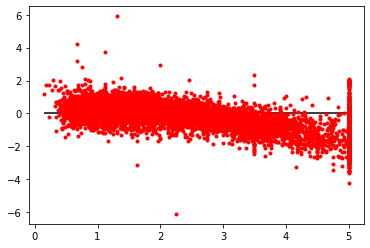

In [167]:
f,ax = plt.subplots()
ax.plot(test_Y, Y_lr_pred-test_Y,"r.")
ax.hlines(0,min(test_Y),max(test_Y))

In [170]:
from sklearn import neighbors
from sklearn import preprocessing
# many methods work better on scaled X
X = preprocessing.scale(X) 
clf1 = neighbors.KNeighborsRegressor(5)

half = math.floor(len(Y)/2)

permutation = np.random.permutation(len(Y))

#randomize order to not have bias!
X = X[permutation]
Y = Y[permutation]

train_X = X[:half]
train_Y = Y[:half]

test_X = X[half:]
test_Y = Y[half:]

In [204]:
clf1 = neighbors.KNeighborsRegressor(1000,weights='uniform')

In [205]:
clf1.fit(train_X,train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1000, p=2,
                    weights='uniform')

In [206]:
predicted_Y = clf1.predict(test_X)

In [207]:
mean_squared_error(predicted_Y,test_Y)

0.7173108730281201

In [202]:
predicted_Y = clf1.predict(train_X)
mean_squared_error(predicted_Y,train_Y)

0.3949776566889696

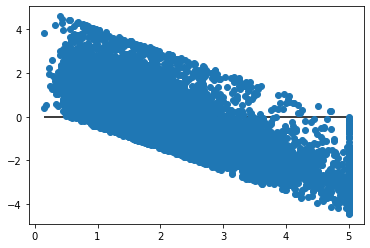

In [203]:
f,ax = plt.subplots()
ax.plot(test_Y, predicted_Y-test_Y,"o")
ax.hlines(0,min(test_Y),max(test_Y))